In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import plotly.express as px

import re
import unicodedata
import nltk

import prepare as p

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('clean_scraped_data.csv')

In [3]:
df = p.map_other_languages(df)

In [4]:
df = df.drop(columns = 'Unnamed: 0')

In [5]:
df

,repo,language,readme_contents,clean,lemmatized
0,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...,minecraft simple minecraftinspired demo writte...,minecraft simple minecraftinspired demo writte...
1,itzg/docker-minecraft-server,Other,[![Docker Pulls](https://img.shields.io/docker...,docker pullshttpsimgshieldsiodockerpullsitzgmi...,docker pullshttpsimgshieldsiodockerpullsitzgmi...
2,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...,minecraft overviewer build status andrew brown...,minecraft overviewer build status andrew brown...
3,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...,minecraftbyexample 1164 purpose minecraftbyexa...,minecraftbyexample 1164 purpose minecraftbyexa...
4,minecraft-dev/MinecraftDev,Other,"<p align=""center""><a href=""https://minecraftde...",p aligncentera hrefhttpsminecraftdevorgimg src...,p aligncentera hrefhttpsminecraftdevorgimg src...
...,...,...,...,...,...
879,Crossroads-Development/Crossroads,Java,# Crossroads\n\nA steampunk technology mod for...,crossroads steampunk technology mod minecraft ...,crossroad steampunk technology mod minecraft i...
880,GeyserMC/PacketLib,Java,# PacketLib\nPacketLib is a library for packet...,packetlib packetlib library packetbased networ...,packetlib packetlib library packetbased networ...
881,Nic4Las/Minecraft-Enderite-Mod,Java,# Enderite Mod\n\n[![](http://cf.way2muchnoise...,enderite mod httpcfway2muchnoiseeuversions3992...,enderite mod httpcfway2muchnoiseeuversions3992...
882,espertus/blockly-lua,JavaScript,Blockly Lua allows you to program ComputerCraf...,blockly lua allows program computercraft turtl...,blockly lua allows program computercraft turtl...


In [6]:
df.language.value_counts()

Java          402
Other         320
JavaScript     86
Python         76
Name: language, dtype: int64

In [7]:
def split_minecraft_data(df):
    '''
    This function performs split on minecraft repo data, stratified on language.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.language)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.language)
    return train, validate, test



In [8]:
train, validate, test = split_minecraft_data(df)

In [9]:
train.language.value_counts()

Java          224
Other         179
JavaScript     48
Python         43
Name: language, dtype: int64

In [10]:
validate.language.value_counts()

Java          97
Other         77
JavaScript    21
Python        18
Name: language, dtype: int64

In [11]:
test.language.value_counts()

Java          81
Other         64
JavaScript    17
Python        15
Name: language, dtype: int64

In [12]:
y_train = train[['language']]

In [13]:
y_train

,language
40,JavaScript
730,Java
243,Java
796,Java
232,Java
...,...
128,JavaScript
51,Java
314,Java
563,JavaScript


In [14]:
X_train = train[['lemmatized']]

In [15]:
X_train

,lemmatized
40,welcome react three fiber minecraft project tr...
730,aoneblock oneblock minecraft plugin written ta...
243,pgm deployhttpsgithubcomelectroidpgmworkflowsd...
796,p aligncenter img srchttpsrawgithubusercontent...
232,minestuck discord server httpsdiscordappcominv...
...,...
128,welcome react three fiber minecraft project tr...
51,imagehttpsuserimagesgithubusercontentcom468811...
314,java version adoptjdk 11 openj9 minecraft cras...
563,jsmc haha would write minecraft server javascr...


# Making split() word lists with target variables

In [16]:
all_minecraft_readme = ' '.join(train['lemmatized'])

In [17]:
all_word_freq = pd.Series(all_minecraft_readme.split()).value_counts()

### Python

In [18]:
python_df = train[train.language == 'Python']

In [19]:
python_df

,repo,language,readme_contents,clean,lemmatized
538,Mekolaos/Aternos-On-Discord,Python,# Aternos On Discord \n[![Build Status](https:...,aternos discord build statushttpstraviscicomme...,aternos discord build statushttpstraviscicomme...
22,Hawstein/PyMinecraft,Python,# Minecraft\n\n这是用Python和Pyglet写的简单的Minecraft游...,minecraft pythonpygletminecraft httpsgithubcom...,minecraft pythonpygletminecraft httpsgithubcom...
594,GreenTurtwig/MinecraftServer-HA,Python,"# Minecraft Server Home Assistant Sensor\n""Now...",minecraft server home assistant sensor flash l...,minecraft server home assistant sensor flash l...
505,martinsik/minecraft-dynmap-timemachine,Python,# Minecraft Dynmap Time Machine\n\n[![Build St...,minecraft dynmap time machine build statushttp...,minecraft dynmap time machine build statushttp...
697,Podshot/MCEdit-Unified,Python,# MCEdit-Unified\n\nMCEdit-Unified is an updat...,mceditunified mceditunified updated fork origi...,mceditunified mceditunified updated fork origi...
306,RimoChan/minecraft,Python,# minecraft\n\nOpengl的沙盒FPS游戏！ \n看起来很像某知名沙盒游戏...,minecraft openglfps webp jpg python3 pip insta...,minecraft openglfps webp jpg python3 pip insta...
771,MCDReforged/MinecraftDataAPI,Python,# Minecraft Data API\n-------------\n\n[中文](ht...,minecraft data api httpsgithubcommcdreforgedmi...,minecraft data api httpsgithubcommcdreforgedmi...
820,arpruss/raspberryjammod,Python,# raspberryjammod\nRaspberry Jam Mod - a Mod F...,raspberryjammod raspberry jam mod mod forge mi...,raspberryjammod raspberry jam mod mod forge mi...
503,mcedit/mcedit,Python,<html>\n<title>\nMCEdit Alpha \n</title>\n<bod...,html title mcedit alpha title body div stylewi...,html title mcedit alpha title body div stylewi...
509,m0r13/mclogalyzer,Python,# MCLogalyzer #\n\nThis is a small Python scri...,mclogalyzer small python script analyze minecr...,mclogalyzer small python script analyze minecr...


In [20]:
all_python_readme = ' '.join(python_df['lemmatized'])
pd.Series(all_python_readme.split()).value_counts().head(20)

'            219
minecraft    189
server       134
install      134
python       122
use           89
version       89
file          83
run           81
world         72
image         61
0             61
chunk         59
default       57
using         57
make          56
block         55
map           54
span          51
mod           51
dtype: int64

In [21]:
python_word_freq = pd.Series(all_python_readme.split()).value_counts()

In [22]:
python_word_freq

'                         219
minecraft                 189
server                    134
install                   134
python                    122
                         ... 
prevents                    1
unpleasant                  1
surprise                    1
mpx                         1
gdlauncherhttpsgdevsio      1
Length: 3567, dtype: int64

### Java

In [23]:
java_df = train[train.language == 'Java']
all_java_readme = ' '.join(java_df['lemmatized'])
pd.Series(all_java_readme.split()).value_counts().head(20)

'            845
mod          525
minecraft    476
server       429
build        339
version      320
use          298
project      245
file         242
&#9;         238
code         233
player       220
run          216
support      194
issue        180
feature      171
command      167
using        164
java         163
forge        162
dtype: int64

In [24]:
java_word_freq = pd.Series(all_java_readme.split()).value_counts()

### JavaScript

In [25]:
javascript_df = train[train.language == 'JavaScript']
all_javascript_readme = ' '.join(javascript_df['lemmatized'])
pd.Series(all_javascript_readme.split()).value_counts().head(20)

'            487
&#9;         334
server       253
minecraft    179
command      153
file         103
run          103
backup        82
start         74
test          74
version       66
werden        64
say           64
set           64
npm           61
block         61
install       61
1             60
using         59
directory     57
dtype: int64

In [26]:
javascript_word_freq = pd.Series(all_javascript_readme.split()).value_counts()

# Create bigrams

In [27]:
all_minecraft_readme_bigrams = (pd.Series(nltk.ngrams(all_minecraft_readme.split(), 2))
                      .value_counts())

all_minecraft_readme_bigrams.head(20)

(&#9;, &#9;)            411
(minecraft, server)     230
(make, sure)            128
(pull, request)         121
(git, clone)             74
(source, code)           72
(', ')                   69
(minecraft, version)     65
(server, ')              63
(jar, file)              59
(p, aligncenter)         58
(feel, free)             57
(bedrock, edition)       52
(resource, pack)         52
(java, edition)          52
(open, source)           51
(latest, version)        51
(command, line)          51
(gradlew, build)         51
(', need)                50
dtype: int64

### Python

In [28]:
top_20_all_python_readme_bigrams = (pd.Series(nltk.ngrams(all_python_readme.split(), 2))
                      .value_counts()
                      .head(20))

pybi_df = pd.DataFrame(top_20_all_python_readme_bigrams) #.head(20)

#pybi_df = pd.DataFrame(pybi_df, columns=['Bigram', 'Count'])



In [29]:
pybi_df.columns = ['Count']
pybi_df.index.name = 'Bigram'
pybi_df

,Count
Bigram,
"(pip, install)",36
"(0, chunk)",21
"(minecraft, server)",20
"(span, stylefontweight)",15
"(infoblocklight, pas)",14
"(infoskylight, pas)",14
"(chunk, infoskylight)",14
"(minecraft, world)",13
"(minecraft, version)",13


In [30]:
list(pybi_df.index)

[('pip', 'install'),
 ('0', 'chunk'),
 ('minecraft', 'server'),
 ('span', 'stylefontweight'),
 ('infoblocklight', 'pas'),
 ('infoskylight', 'pas'),
 ('chunk', 'infoskylight'),
 ('minecraft', 'world'),
 ('minecraft', 'version'),
 ('chunk', 'infoblocklight'),
 ('java', 'edition'),
 ('classsimg', 'altimageabr'),
 ("'", "'"),
 ('make', 'sure'),
 ('aptget', 'install'),
 ('sudo', 'aptget'),
 ('default', 'value'),
 ('br', 'span'),
 ('minecraft', "'"),
 ('player', 'player')]

### Java

In [31]:
top_20_all_java_readme_bigrams = (pd.Series(nltk.ngrams(all_java_readme.split(), 2))
                      .value_counts()
                      .head(20))

top_20_all_java_readme_bigrams.head(20)

(&#9;, &#9;)            99
(pull, request)         70
(make, sure)            56
(gradlew, build)        44
(minecraft, mod)        38
(run, gradlew)          37
(minecraft, server)     36
(open, source)          32
(jar, file)             31
(source, code)          29
(mod, minecraft)        27
(minecraft, version)    27
(minecraft, forge)      26
(command, line)         26
(p, aligncenter)        24
(java, jar)             24
(public, license)       23
(mod, ')                23
(feel, free)            21
(git, clone)            21
dtype: int64

### JavaScript

In [32]:
top_20_all_javascript_readme_bigrams = (pd.Series(nltk.ngrams(all_javascript_readme.split(), 2))
                      .value_counts()
                      .head(20))

top_20_all_javascript_readme_bigrams.head(20)

(&#9;, &#9;)           221
(minecraft, server)     43
(', ')                  28
(npm, install)          23
(window, 10)            17
(require, ')            16
(run, command)          16
(server, ')             14
(npm, run)              14
(ip, address)           13
(', need)               13
(&#9;, say)             13
(var, test)             13
(&#9;, command)         12
(discord, bot)          12
(command, &#9;)         12
(git, clone)            11
(npm, start)            11
(bedrock, edition)      11
(j, const)              11
dtype: int64

# Create Trigrams

### Python

In [33]:
top_20_all_python_readme_trigrams = (pd.Series(nltk.ngrams(all_python_readme.split(), 3))
                      .value_counts()
                      .head(20))

top_20_all_python_readme_trigrams.head(20)

(chunk, infoskylight, pas)           14
(chunk, infoblocklight, pas)         13
(0, chunk, infoblocklight)           11
(sudo, aptget, install)              10
(classsimg, altimageabr, br)          9
(0, chunk, infoskylight)              8
(pip, install, user)                  7
(minecraft, java, edition)            7
(tool, span, spanbr)                  6
(install, r, requirementstxt)         6
(python, setuppy, develop)            5
(pip, install, r)                     5
(timeout, optionalfloat, none)        4
(img, altbuilt, fabulously)           4
(pickaxe, 2, stick)                   4
(pip, install, quarry)                4
(span, stylefontweight, bolde)        4
(client, server, proxy)               4
(altbuilt, fabulously, optimized)     4
(following, entity, data)             4
dtype: int64

### Java

In [34]:
top_20_all_java_readme_trigrams = (pd.Series(nltk.ngrams(all_java_readme.split(), 3))
                      .value_counts()
                      .head(20))

top_20_all_java_readme_trigrams.head(20)

(&#9;, &#9;, &#9;)                        38
(boolean, false, true)                    19
(false, true, false)                      19
(true, false, pca)                        19
(general, public, license)                18
(false, pca, feature)                     17
(run, gradlew, build)                     14
(moved, strange, mod)                     13
(gnu, general, public)                    13
(submit, pull, request)                   12
(p, aligncenter, img)                     12
(minecraft, java, edition)                11
(open, command, line)                     10
(minecraft, bedrock, edition)             10
(fitness, particular, purpose)             9
(merchantability, fitness, particular)     9
(warranty, merchantability, fitness)       9
(create, pull, request)                    9
(l, ', installeur)                         9
(de, l, ')                                 9
dtype: int64

### JavaScript

In [35]:
top_20_all_javascript_readme_trigrams = (pd.Series(nltk.ngrams(all_javascript_readme.split(), 3))
                      .value_counts()
                      .head(20))

top_20_all_javascript_readme_trigrams.head(20)

(&#9;, &#9;, &#9;)               177
(&#9;, command, &#9;)              9
(minecraft, bedrock, edition)      8
(test, &#9;, &#9;)                 7
(command, &#9;, execute)           7
(werden, var, test)                6
(minecraft, server, ')             6
(connecting, window, 10)           5
(window, 10, edition)              5
(', test, ')                       5
(npm, install, npm)                5
(', &#9;, command)                 5
(', minecraft, server)             5
(yes, yes, limited)                5
(nbt, require, ')                  4
(require, ', prismarinenbt)        4
(statement, ', &#9;)               4
(', statement, ')                  4
(command, &#9;, &#9;)              4
(statement, run, command)          4
dtype: int64

# Viz

word_counts = (pd.concat([all_word_freq, python_word_freq, java_word_freq, javascript_word_freq], axis=1, sort=True)
                .set_axis(['all', 'python', 'java', 'javascript'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))


KeyError: 'index'

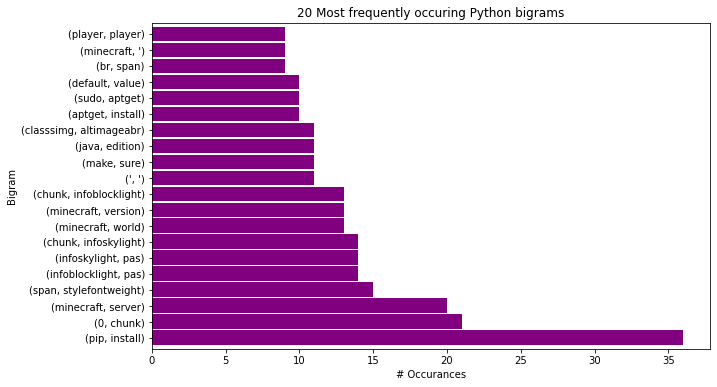

In [36]:
top_20_all_python_readme_bigrams.sort_values(ascending=False).plot.barh(color='purple', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Python bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_all_python_readme_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [ ]:
fig = px.histogram(pybi_df, x='Count', template='plotly_white', title='Top 20 Bigram Count for Python')
fig.update_xaxes(categoryorder='total descending').update_yaxes(title='Bigrams')
fig.show()

In [ ]:
pybi_df